In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Analysis and visualization  of sucide data collected in the period from 1985 to 2016 . It has data from over 100 countries .**
**This project includes the implementation of machine learning specifically linear regression and decision tree**

In [86]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import plotly.express as px



In [ ]:
df = pd.read_csv("/content/drive/MyDrive/master.csv")
data = pd.read_csv("/content/drive/MyDrive/master.csv")

In [ ]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [ ]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [ ]:

shape = df.shape
print("shape of data :" + str(shape))

shape of data :(27820, 12)


In [ ]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [ ]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [ ]:
df.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [ ]:
df = df.fillna(0)

In [ ]:
df.age.unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [ ]:
df.country.unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

here we see that the data contains same number of males and females 

In [ ]:
fig= px.pie(df,names= "sex",title ="pie chart of gender")
fig.show()





classification of generation from total sucides 


In [ ]:
fig= px.pie(df,names= "generation",title ="pie chart of generation")
fig.show()

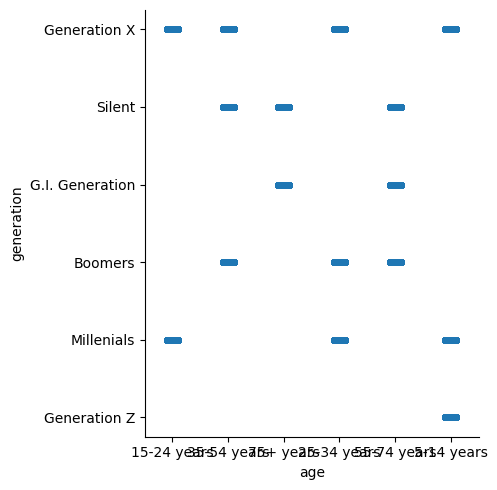

In [ ]:

sns.catplot(data=df, x="age", y="generation")
plt.xstics = 90

In [ ]:
df_year_country = df.drop([])

Text(0, 0.5, 'Number of people that commited suicide')

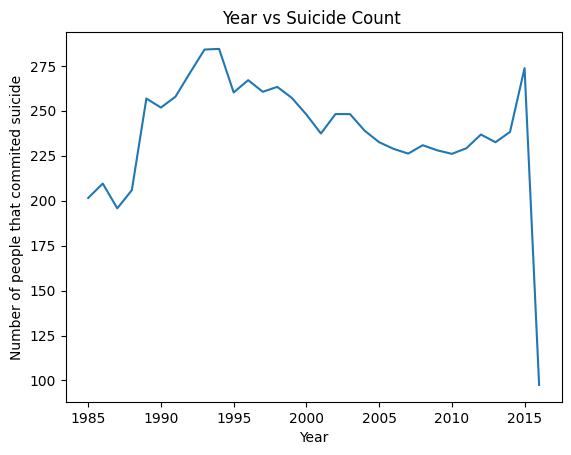

In [ ]:
df.groupby('year')['suicides_no'].mean().plot()
plt.title('Year vs Suicide Count ')
plt.xlabel('Year')
plt.ylabel('Number of people that commited suicide')

Text(0, 0.5, 'Number of people that commited suicide')

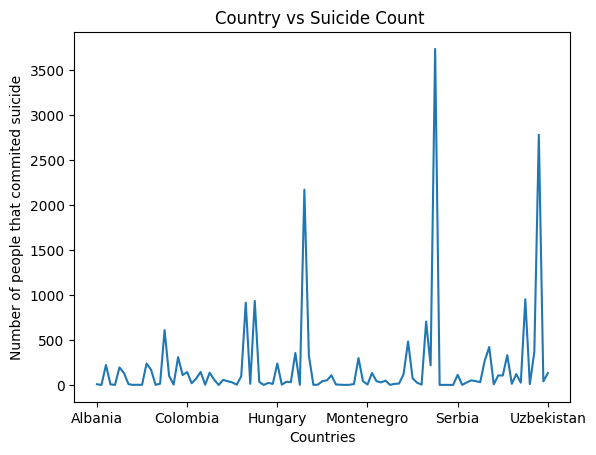

In [ ]:
df.groupby('country')['suicides_no'].mean().plot()
plt.title('Country vs Suicide Count ')
plt.xlabel('Countries')
plt.ylabel('Number of people that commited suicide')

In [ ]:
fig = px.bar(df,
x="sex",
#marginal='box',
y="age",
title='age classification of deaths by sex')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
#take first 2 characters from age column
df['Age_new'] = df['age'].str[:2]

#remove the dashes
df['Age_new'] = df['Age_new'].map(lambda x: x.replace('-',''))

#convert it to type int 
df['Age_new'] = df['Age_new'].astype(int)

df['Age_new'].tail

<bound method NDFrame.tail of 0        15
1        35
2        15
3        75
4        25
         ..
27815    35
27816    75
27817     5
27818     5
27819    55
Name: Age_new, Length: 27820, dtype: int64>

Making new categories according to the ages to have better understanding of data 

In [ ]:
def AgeGroup(x):
    if(x >= 60):
        return "old people"
    elif(x >= 30):
        return "peopleIN_thirties"
    elif(x >= 18):
        return "Adults"
    else:
        return "teens"
# Map each row in the Column to the AgeGroup Method
df['AgeCategory'] =df['Age_new'].map(lambda x: AgeGroup(x))
# convert it back to type String
df['AgeCategory'] =df['AgeCategory'].astype(str)
df['AgeCategory'].tail()
df['AgeCategory']

0                    teens
1        peopleIN_thirties
2                    teens
3               old people
4                   Adults
               ...        
27815    peopleIN_thirties
27816           old people
27817                teens
27818                teens
27819    peopleIN_thirties
Name: AgeCategory, Length: 27820, dtype: object

In [ ]:
df.Age_new

0        15
1        35
2        15
3        75
4        25
         ..
27815    35
27816    75
27817     5
27818     5
27819    55
Name: Age_new, Length: 27820, dtype: int64

In [ ]:
fig= px.pie(df,names= "Age_new",title ="new age categories")
fig.show()

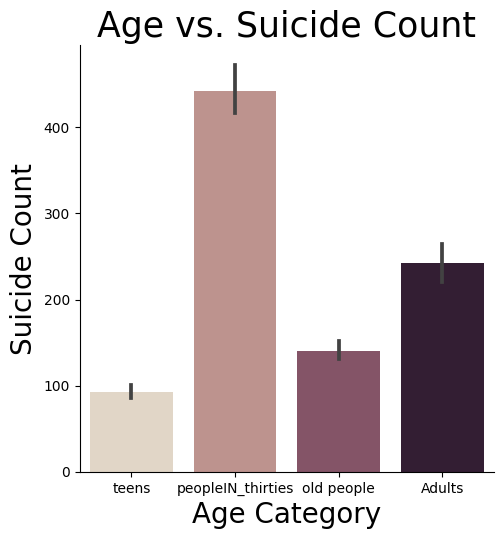

In [ ]:
sns.catplot(x="AgeCategory", y="suicides_no",palette="ch:.25", kind="bar",data=df);

plt.title('Age vs. Suicide Count',size=25)
plt.xlabel('Age Category',size=20)
plt.ylabel('Suicide Count',size=20);

<Axes: xlabel='sex', ylabel='suicides_no'>

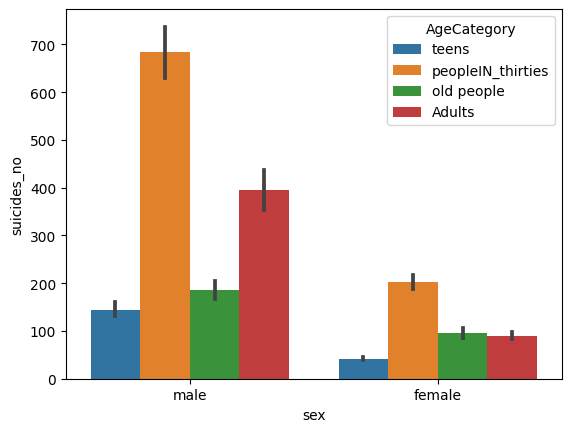

In [ ]:
sns.barplot(x = 'sex', y = 'suicides_no', hue = 'AgeCategory', data= df)

In [ ]:
df["gdp_per_capita ($)"]

0         796
1         796
2         796
3         796
4         796
         ... 
27815    2309
27816    2309
27817    2309
27818    2309
27819    2309
Name: gdp_per_capita ($), Length: 27820, dtype: int64

df after adding new column 

In [ ]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,Age_new,AgeCategory
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.000,"2,156,624,900",796,Generation X,15,teens
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.000,"2,156,624,900",796,Silent,35,peopleIN_thirties
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.000,"2,156,624,900",796,Generation X,15,teens
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.000,"2,156,624,900",796,G.I. Generation,75,old people
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.000,"2,156,624,900",796,Boomers,25,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X,35,peopleIN_thirties
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent,75,old people
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z,5,teens
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z,5,teens


In [ ]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,Age_new,AgeCategory
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.0,"2,156,624,900",796,Generation X,15,teens
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.0,"2,156,624,900",796,Silent,35,peopleIN_thirties
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.0,"2,156,624,900",796,Generation X,15,teens
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.0,"2,156,624,900",796,G.I. Generation,75,old people
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.0,"2,156,624,900",796,Boomers,25,Adults


In [ ]:
country_wise=df.groupby("country")
country_wise.first()

,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,Age_new,AgeCategory
country,,,,,,,,,,,,,
Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.000,"2,156,624,900",796,Generation X,15,teens
Antigua and Barbuda,1985,female,15-24 years,0,7709,0.00,Antigua and Barbuda1985,0.000,"240,923,926",3850,Generation X,15,teens
Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,0.694,"88,416,668,900",3264,G.I. Generation,75,old people
Armenia,1990,male,35-54 years,25,332700,7.51,Armenia1990,0.632,"2,256,838,858",756,Silent,35,peopleIN_thirties
Aruba,1995,male,75+ years,2,889,224.97,Aruba1995,0.000,"1,320,670,391",17949,G.I. Generation,75,old people
...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Arab Emirates,2005,male,35-54 years,42,1083147,3.88,United Arab Emirates2005,0.822,"180,617,018,380",42196,Boomers,35,peopleIN_thirties
United Kingdom,1985,male,75+ years,264,1202838,21.95,United Kingdom1985,0.753,"489,285,164,271",9231,G.I. Generation,75,old people
United States,1985,male,75+ years,2177,4064000,53.57,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation,75,old people


In [ ]:
df['suicides/100k pop']>50

0        False
1        False
2        False
3        False
4        False
         ...  
27815    False
27816    False
27817    False
27818    False
27819    False
Name: suicides/100k pop, Length: 27820, dtype: bool

In [ ]:
high_index_suicides= df["suicides/100k pop"].idxmax()
low_index_sucides= df["suicides/100k pop"].idxmin()
print("country with the highest 'suicides/100k pop' is : " + df["country"][high_index_suicides])
print("country with the lowest 'suicides/100k pop' is : "+df["country"][low_index_sucides])


country with the highest 'suicides/100k pop' is : Aruba
country with the lowest 'suicides/100k pop' is : Albania


 **IMPORTANT** --**click on the graph and slide to get a better view  since there are many countries 

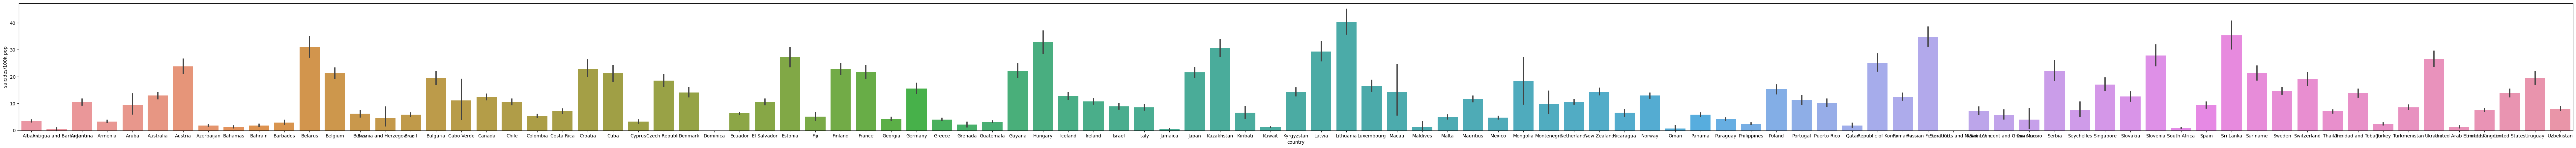

In [ ]:

fig, ax = plt.subplots(figsize=(100, 5))
 
inter = sns.barplot(y= "suicides/100k pop" , x="country",data=df)


To have a better understanding of data and classification we are dividing "sucide_no" by the "population"
here we are trying to figure out the country  with the minimum and maximum  sucide number per population 

In [ ]:
df['suicide_no_Per_population'] = df['suicides_no']/df['population']
#df=df.drop(["suicide_per_population"],axis=1)

ct= df['suicide_no_Per_population'].max()
#minimum death sucide no per population
maximum = df["suicide_no_Per_population"].idxmax()
minimum = df["suicide_no_Per_population"].idxmin()
print("country with the highest sucide no per population is :" +df['country'][maximum])
print("country with the lowest sucide no per population is :" +df['country'][minimum])



country with the highest sucide no per population is :Aruba
country with the lowest sucide no per population is :Albania


<Axes: xlabel='generation', ylabel='suicide_no_Per_population'>

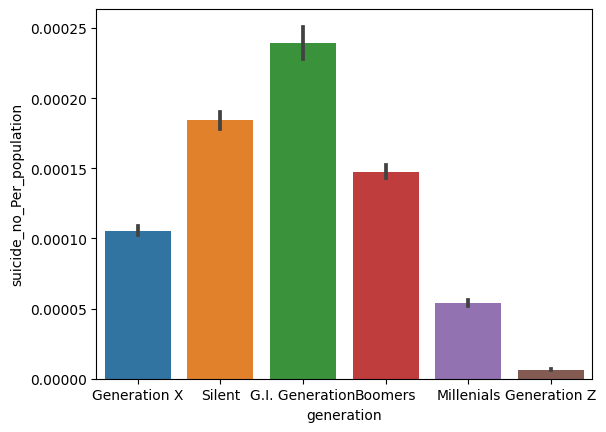

In [ ]:
sns.barplot(y="suicide_no_Per_population",x ="generation" ,data = df)

In [ ]:
new_dfff= df["country"]=="Uzbekistan"
new_dfff

0        False
1        False
2        False
3        False
4        False
         ...  
27815     True
27816     True
27817     True
27818     True
27819     True
Name: country, Length: 27820, dtype: bool

<Axes: xlabel='suicides_no', ylabel='population'>

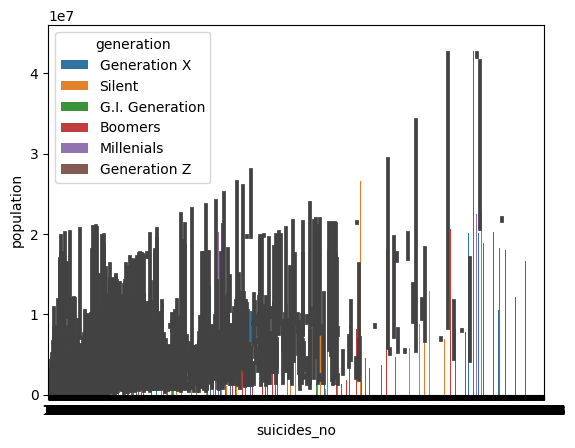

In [ ]:

sns.barplot(y = "population",x="suicides_no",hue = "generation",data = df)

**IMPORTANT** --** click on the graph and slide over it 

<Axes: >

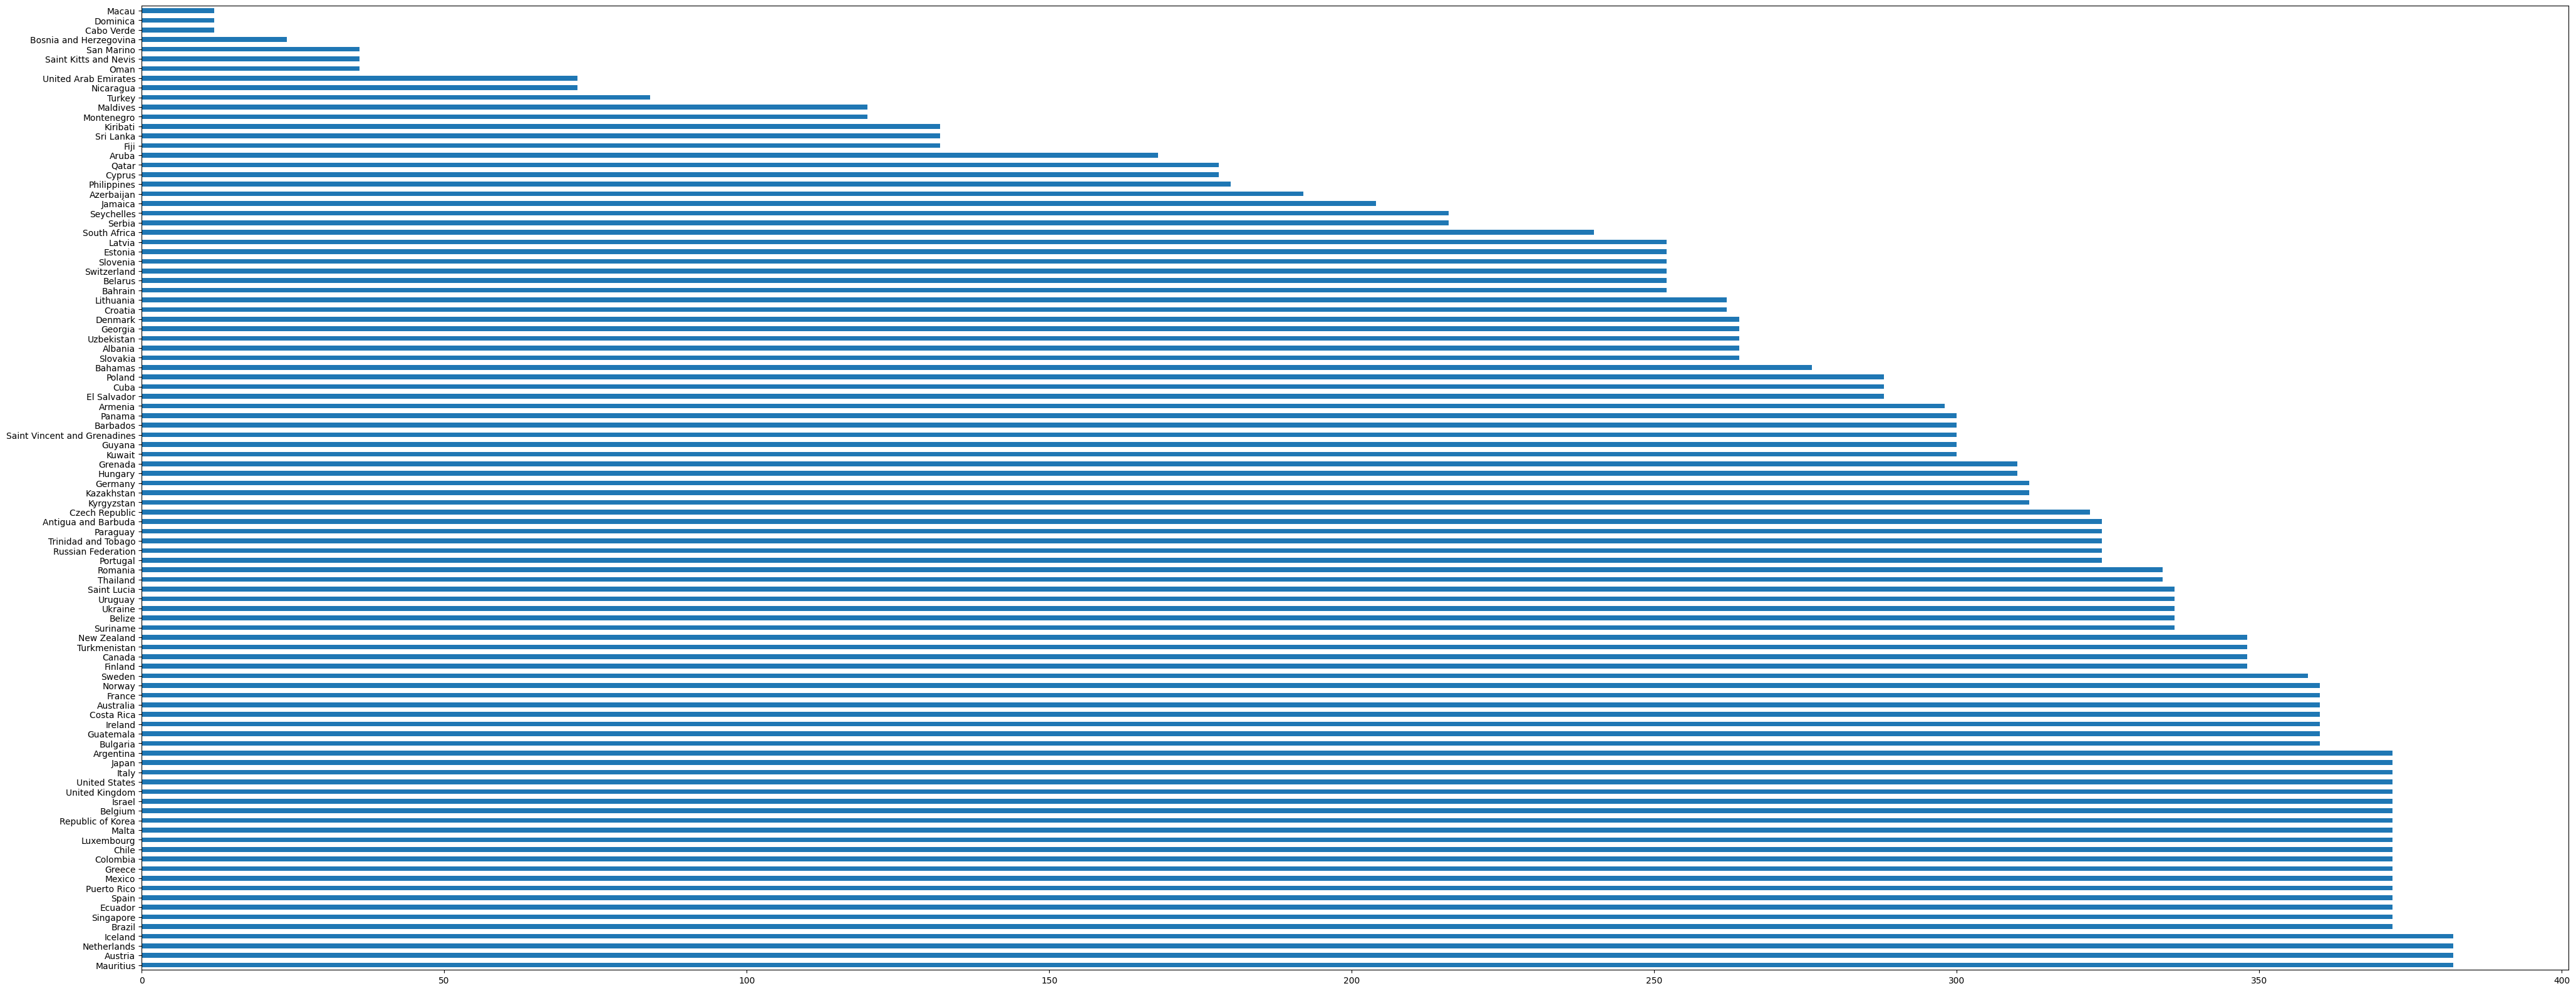

In [ ]:
df['country'].value_counts().head(100).plot(kind='barh', figsize=(50,20))

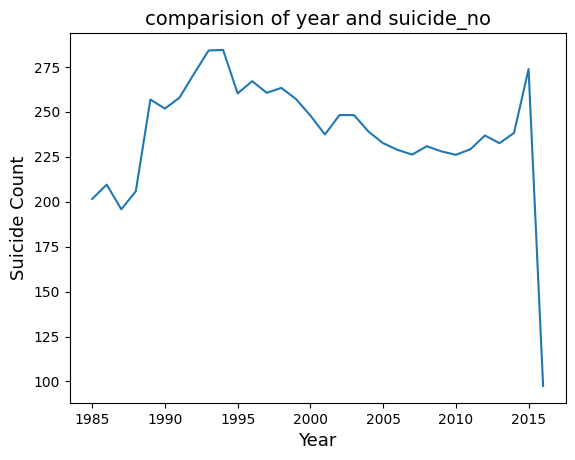

In [ ]:
df.groupby('year')['suicides_no'].mean().plot()
plt.title("comparision of year and suicide_no",fontsize = 14)
plt.xlabel('Year',fontsize = 13)
plt.ylabel('Suicide Count',fontsize = 13)
sns.set(rc={'figure.figsize':(15,15)})
sns.set_style("whitegrid")

**Linear Regression on the data **

In [ ]:
newData= df.loc[:,['year','sex','Age_new','suicides_no']]
newData.head(3)

,year,sex,Age_new,suicides_no
0,1987,male,15,21
1,1987,male,35,16
2,1987,female,15,14


In [ ]:
X = newData.iloc[:, :-1].values 
y = newData.iloc[:, -1].values 
X
y

array([21, 16, 14, ..., 60, 44, 21])

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)  

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
print(regressor.predict([[1,0,2001,55]]))


[146.28981648]


DECISION TREE 

In [ ]:
data

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [ ]:
data.drop('country' , axis = 1 ,inplace = True)

In [ ]:
data.head()

**DATA PREPROCESSING**

In [87]:
data.generation.unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [88]:
label_to_Id  = {}
for i,e in enumerate(data.generation.unique()):
    label_to_Id[e] = i

In [90]:
label_to_Id

{'Generation X': 0,
 'Silent': 1,
 'G.I. Generation': 2,
 'Boomers': 3,
 'Millenials': 4,
 'Generation Z': 5}

In [91]:
data["encoded_species"] = data["generation"].map(label_to_Id)

In [92]:
data["encoded_species"]

0        0
1        1
2        0
3        2
4        3
        ..
27815    0
27816    1
27817    5
27818    5
27819    3
Name: encoded_species, Length: 27820, dtype: int64

In [95]:
data

,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),encoded_species
0,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,0
1,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,1
2,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,0
3,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,2
4,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,3
...,...,...,...,...,...,...,...,...,...,...,...
27815,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,0
27816,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,1
27817,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,5
27818,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,5


In [94]:
data.drop("generation" , inplace = True, axis = 1)

In [96]:
data.head()

,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),encoded_species
0,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,0
1,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,1
2,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,0
3,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,2
4,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,3


**DATA MODELING**

In [97]:
output = data["encoded_species"]
input = data.drop(["encoded_species","sex","age","country-year"],axis = 1)
input = input.drop(input.columns[[5,6]],axis =1)

In [98]:
input =input.fillna(0)
input

,year,suicides_no,population,suicides/100k pop,HDI for year
0,1987,21,312900,6.71,0.000
1,1987,16,308000,5.19,0.000
2,1987,14,289700,4.83,0.000
3,1987,1,21800,4.59,0.000
4,1987,9,274300,3.28,0.000
...,...,...,...,...,...
27815,2014,107,3620833,2.96,0.675
27816,2014,9,348465,2.58,0.675
27817,2014,60,2762158,2.17,0.675
27818,2014,44,2631600,1.67,0.675


**SPLITTING THE SET**

In [99]:

from sklearn.model_selection import train_test_split

train_input,test_input,train_output,test_output = train_test_split(input,output , test_size = 0.2,random_state = 10)

In [100]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion = "gini", max_depth = 4, )
dtc.fit(train_input,train_output)

DecisionTreeClassifier(max_depth=4)

In [101]:
ypred_train =  dtc.predict(train_input)
ypred_test = dtc.predict(test_input)

print(ypred_train)
print(ypred_test)

[4 1 4 ... 1 1 1]
[1 4 0 ... 4 4 1]


In [102]:
from sklearn.metrics import accuracy_score,f1_score

print("Accuracy train : ",accuracy_score(train_output,ypred_train))
print("Accuracy test : ",accuracy_score(test_output,ypred_test))

Accuracy train :  0.45992092020129405
Accuracy test :  0.46369518332135157


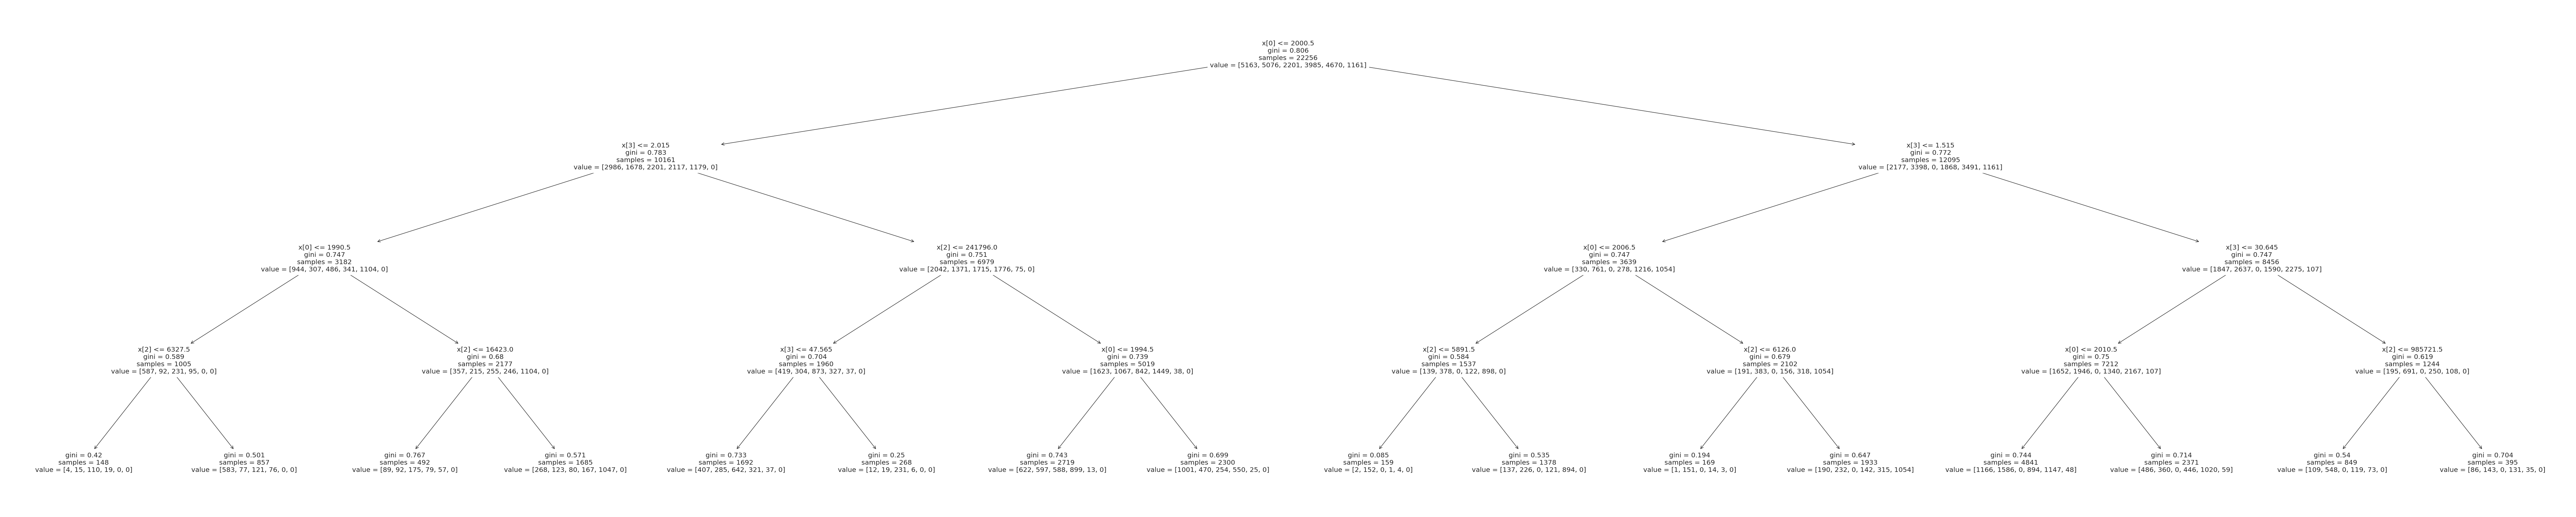

In [108]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
plt.figure(figsize=[100,20])
plot_tree(dtc)
plt.show()

**mesg for the reader** This project could have been a lot more better then this but due to exams that is all i could do in one day .
a big thank you for all your  time 


i am open to all suggestions -- https://www.linkedin.com/in/shivpratap-singh-panwar-62b0141b3/